In [27]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from pprint import pprint
import folium
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [28]:
df = pd.read_csv("C:\\Users\\ignci\\OneDrive\\Escritorio\\Curso\\Coisigna\\dsb-p2-ml\\ipynbs\datasets\\Madrid air bnb\\listings_detailed.csv")

In [29]:
df["price"]  = df["price"] .apply(lambda x: float(x.strip("$").replace(',', '')) if pd.notnull(x) else x)

In [30]:
df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20210413152844,2021-04-15,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,NaN,https://a0.muscache.com/pictures/683224/4cc318...,13660,https://www.airbnb.com/users/show/13660,...,10.0,10.0,10.0,NaN,f,1,0,1,0,0.58
1,21853,https://www.airbnb.com/rooms/21853,20210413152844,2021-04-16,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,https://www.airbnb.com/users/show/83531,...,10.0,8.0,9.0,NaN,f,2,0,2,0,0.42
2,23001,https://www.airbnb.com/rooms/23001,20210413152844,2021-04-16,Apartmento Arganzuela- Madrid Rio,"Apartamento de tres dormitorios dobles, gran s...","Barrio Arganzuela, junto a Madrid Rio, zonas c...",https://a0.muscache.com/pictures/58e6a770-509c...,82175,https://www.airbnb.com/users/show/82175,...,NaN,NaN,NaN,NaN,f,7,6,1,0,NaN
3,24805,https://www.airbnb.com/rooms/24805,20210413152844,2021-04-15,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...","The area is next to the Gran Via, so people li...",https://a0.muscache.com/pictures/miso/Hosting-...,346366726,https://www.airbnb.com/users/show/346366726,...,10.0,10.0,10.0,NaN,t,1,1,0,0,0.13
4,26825,https://www.airbnb.com/rooms/26825,20210413152844,2021-04-15,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,"Es un barrio muy tranquilo, en una zona de Mad...",https://a0.muscache.com/pictures/149358/218d5b...,114340,https://www.airbnb.com/users/show/114340,...,9.0,9.0,9.0,NaN,f,1,0,1,0,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19613,49185822,https://www.airbnb.com/rooms/49185822,20210413152844,2021-04-15,Habitación con TV con Netflix en Lavapiés,"*facturas incluidas (gas, electricidad, intern...",NaN,https://a0.muscache.com/pictures/59be7fbb-28b3...,172011610,https://www.airbnb.com/users/show/172011610,...,NaN,NaN,NaN,NaN,f,8,0,8,0,NaN
19614,49186179,https://www.airbnb.com/rooms/49186179,20210413152844,2021-04-16,Habitación con TV con Netflix en Gaztambide,"*facturas incluidas (gas, electricidad, intern...",NaN,https://a0.muscache.com/pictures/62d916ba-bea9...,172011610,https://www.airbnb.com/users/show/172011610,...,NaN,NaN,NaN,NaN,f,8,0,8,0,NaN
19615,49187258,https://www.airbnb.com/rooms/49187258,20210413152844,2021-04-15,Habitación con TV con Netflix en Chamberí,"*facturas incluidas (gas, electricidad, Intern...",NaN,https://a0.muscache.com/pictures/be000599-44d6...,172011610,https://www.airbnb.com/users/show/172011610,...,NaN,NaN,NaN,NaN,f,8,0,8,0,NaN
19616,49187471,https://www.airbnb.com/rooms/49187471,20210413152844,2021-04-15,Habitación con TV con Netflix en Goya,"*facturas incluidas (gas, electricidad, intern...",NaN,https://a0.muscache.com/pictures/ffbecf79-945e...,172011610,https://www.airbnb.com/users/show/172011610,...,NaN,NaN,NaN,NaN,f,8,0,8,0,NaN


In [31]:
df = df[df["price"]<1000]

## beds

In [ ]:
df["beds"].isnull().value_counts()

In [ ]:
sns.countplot(df["beds"])

In [ ]:
sns.boxplot(df["beds"])

In [ ]:
df = df[(df["beds"]<5) &( df["beds"]!= 0)]

In [ ]:
df =  df[(df["price"]<1000)]

In [ ]:
df.shape

In [ ]:
df["beds"]

In [ ]:
df[df["beds"]<5]["price"]

In [ ]:
for i in range(1,5):
    sns.histplot(df[df["beds"]==i]["price"])
    plt.show()

In [ ]:
for i in range(1,5):
    sns.boxplot(df[df["beds"]==i]["price"])
    plt.show()

## amenities

In [ ]:
df["amenities"]

## minimum_nights

In [ ]:
df = df[df["minimum_nights"]<8]

In [ ]:
sns.countplot(df["minimum_nights"])

In [ ]:
for i in range(1,8):
    sns.boxplot(df[df["minimum_nights"]==i]["price"])
    plt.show
    
for i in range(1,5):
    sns.boxplot(df[df["beds"]==i]["price"])
    plt.show()

In [ ]:
for i in range(1,8):
    sns.histplot(df[df["minimum_nights"]==i]["price"])
    plt.show()

## maximum_nights

In [ ]:
df = df[df["maximum_nights"]>500]

In [ ]:
df.shape

In [ ]:
df["maximum_nights"].unique()

In [ ]:
df["maximum_nights"].value_counts

In [ ]:
sns.countplot(df["maximum_nights"])

In [ ]:
sns.kdeplot(df["maximum_nights"])

In [ ]:
for i in range(1,8):
    sns.histplot(df[df["maximum_nights"]==i]["price"])
    plt.show()

## minimum_minimum_nights

In [ ]:
df[["minimum_minimum_nights","minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm"]]

In [ ]:
df[["availability_30","availability_60", "availability_90" ,"availability_365"]]

In [ ]:
sns.countplot(df["host_is_superhost"])

In [ ]:
df["price"]

In [ ]:
sns.histplot(df[df["host_is_superhost"] == "t"]["price"])

In [ ]:
sns.countplot(df["property_type"])

In [ ]:
df["property_type"].value_counts()

In [ ]:
len(df["neighbourhood_cleansed"].unique())

In [ ]:
len(df["neighbourhood_group_cleansed"].unique())

In [ ]:
sns.countplot(df["neighbourhood_group_cleansed"])

In [ ]:
sns.countplot(df["neighbourhood_cleansed"])

In [ ]:
sns.countplot(df["neighbourhood_cleansed"])

In [ ]:
df = df[df["price"]<700]

In [ ]:
sns.histplot(df[df["host_is_superhost"] == "t"]["price"])

In [ ]:
sns.histplot(df[df["host_is_superhost"] == "f"]["price"])

## number_of_reviews

In [32]:
df["number_of_reviews"].isnull().value_counts()

False    19333
Name: number_of_reviews, dtype: int64

In [33]:
df["number_of_reviews"].value_counts()

0      5458
1      1840
2      1038
3       758
4       574
       ... 
367       1
364       1
277       1
318       1
356       1
Name: number_of_reviews, Length: 434, dtype: int64

In [34]:
df = df[df["number_of_reviews"]<200]

In [35]:
df = df[df["price"]<700]

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_of_reviews', ylabel='count'>

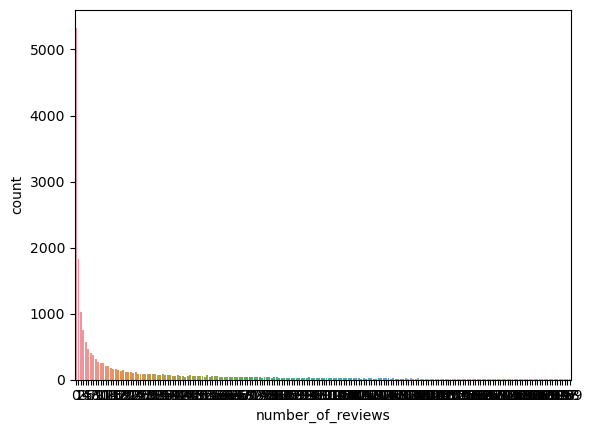

In [36]:
sns.countplot(df["number_of_reviews"])

<AxesSubplot:xlabel='number_of_reviews', ylabel='Density'>

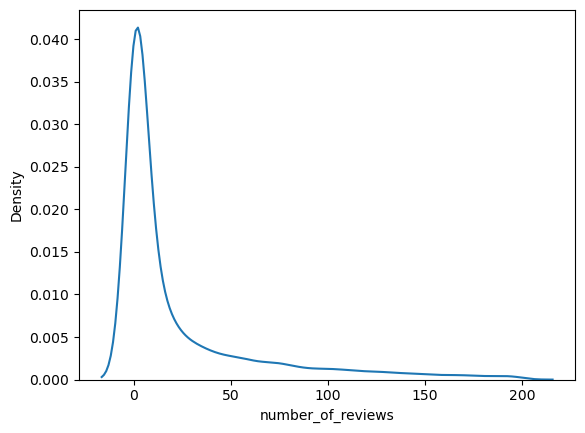

In [37]:
sns.kdeplot(df["number_of_reviews"])

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


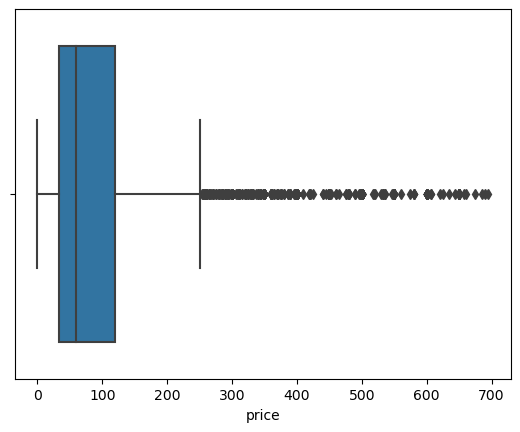

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


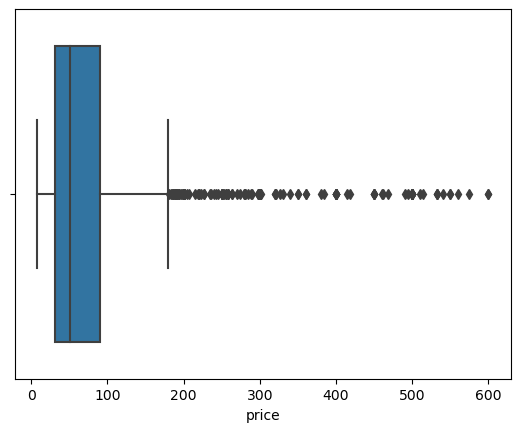

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


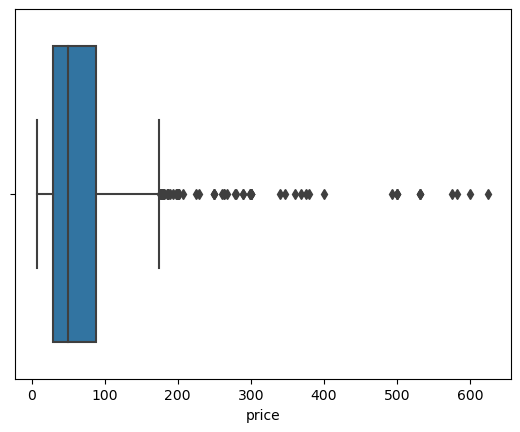

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


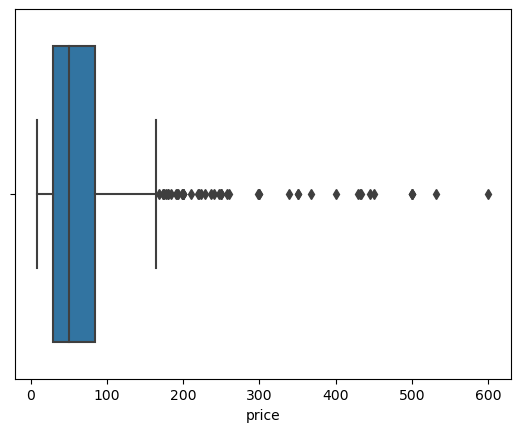

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


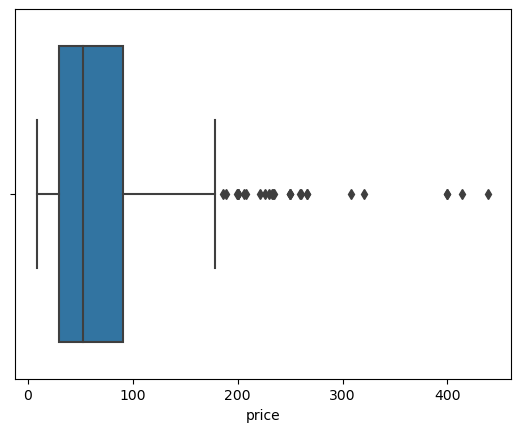

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


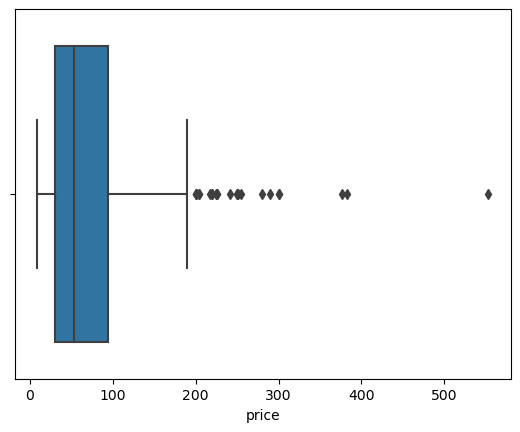

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


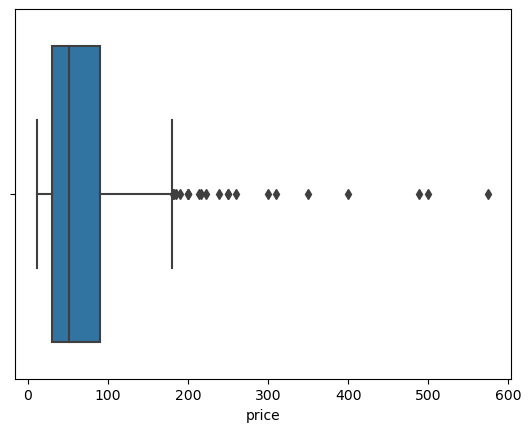

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


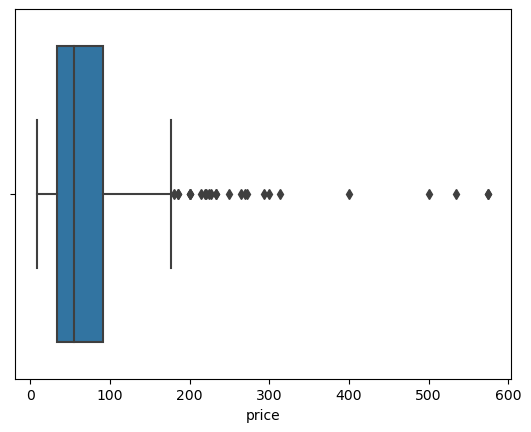

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


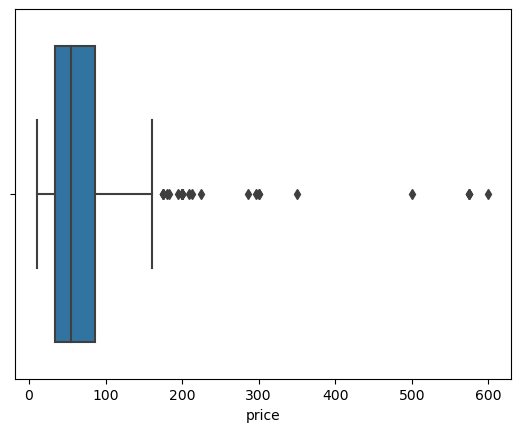

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


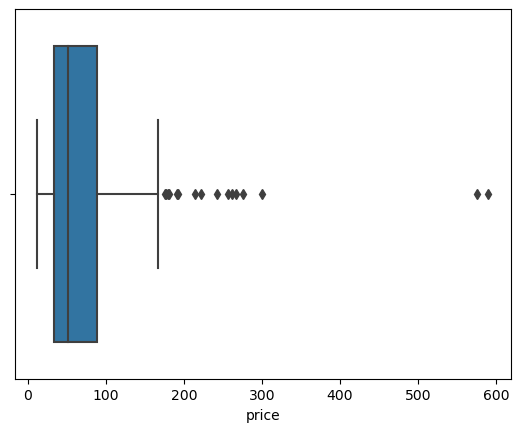

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


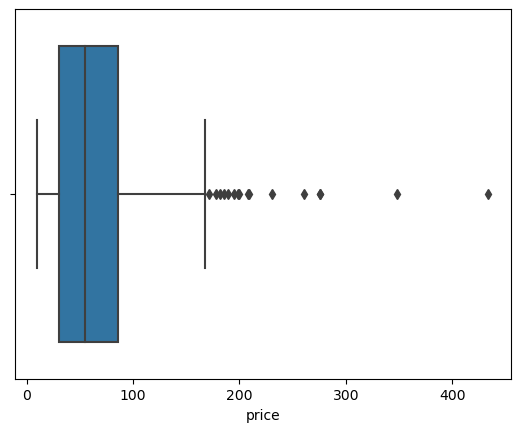

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


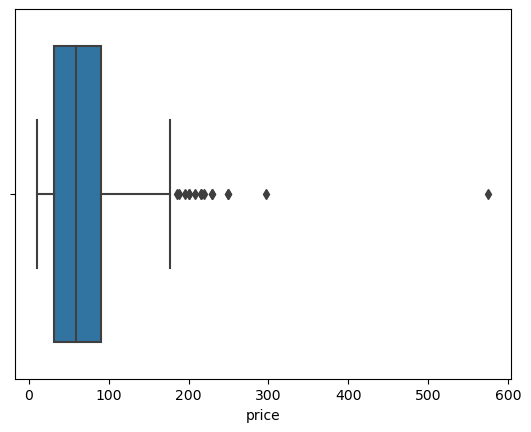

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


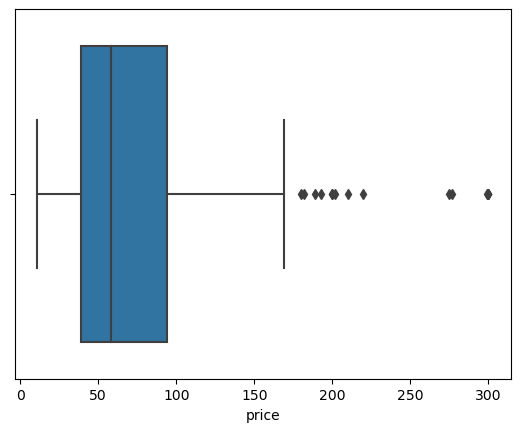

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


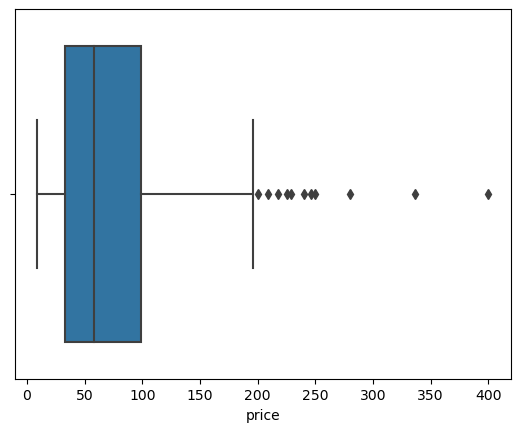

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


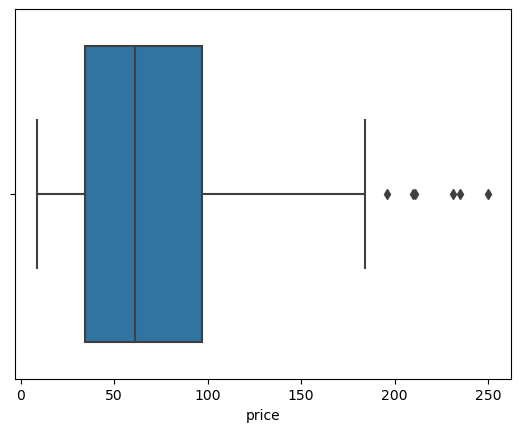

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


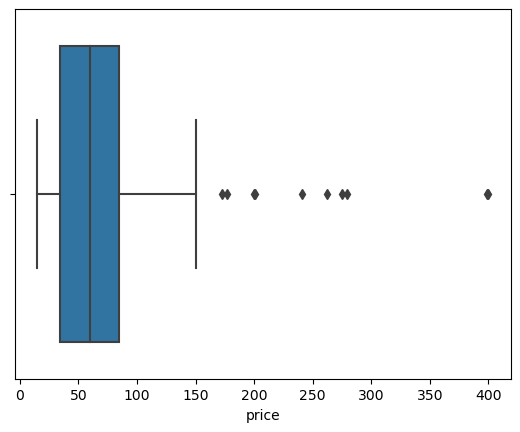

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


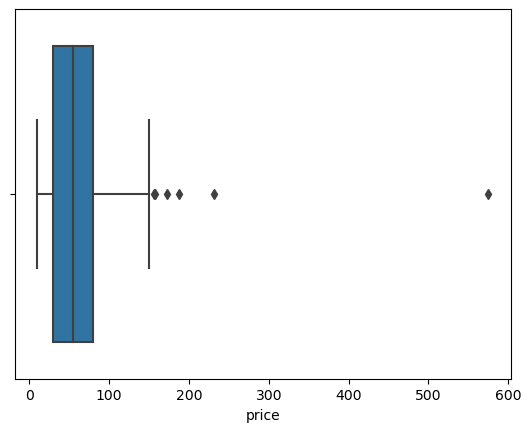

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


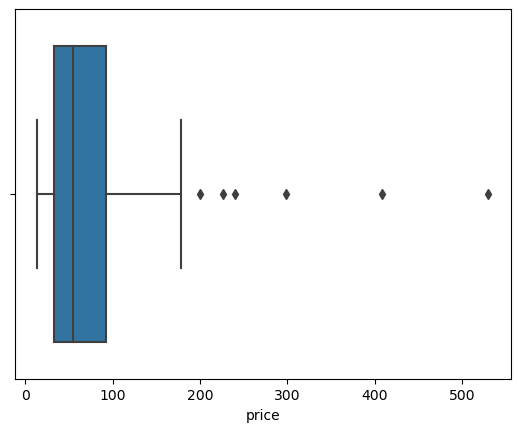

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


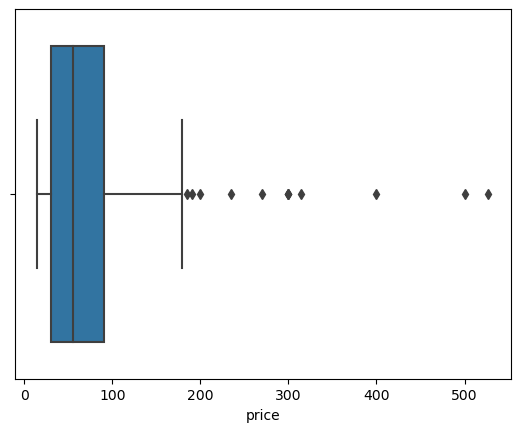

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


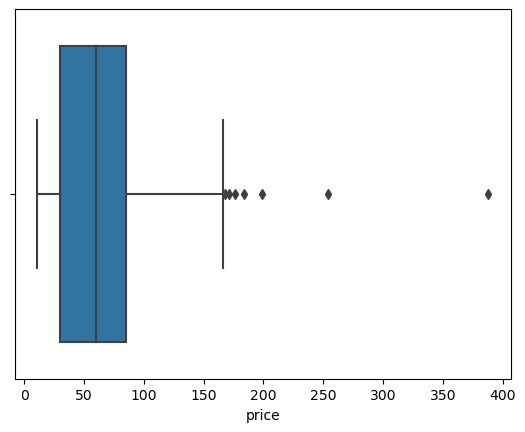

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


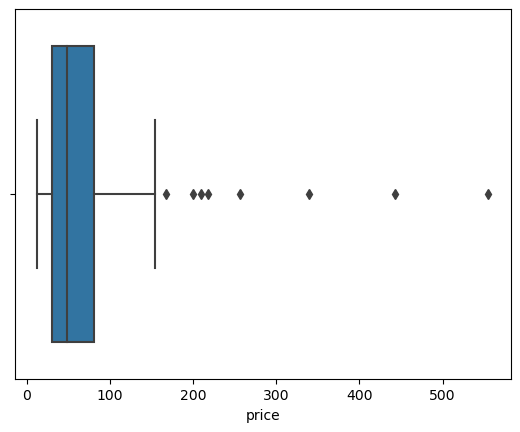

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


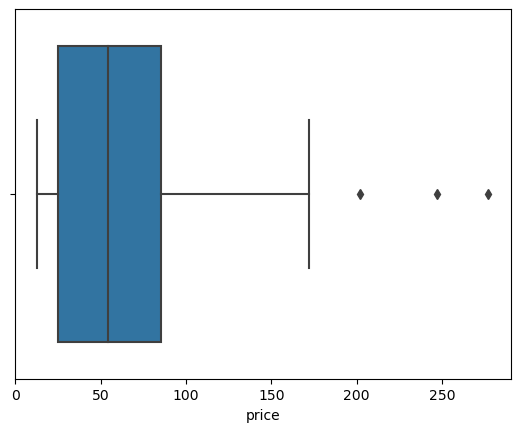

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


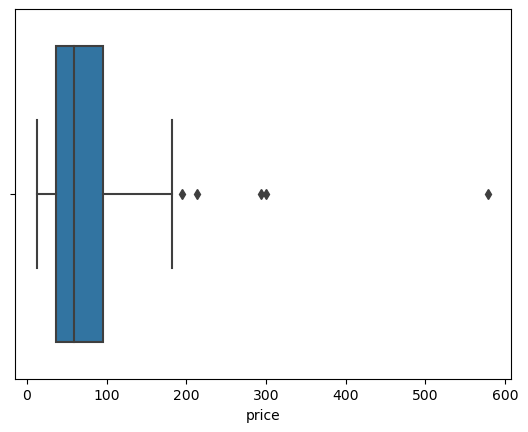

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


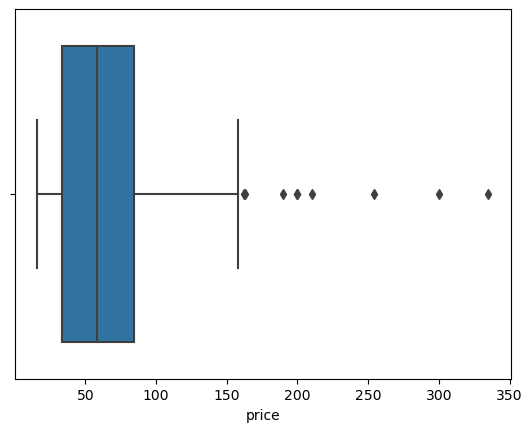

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


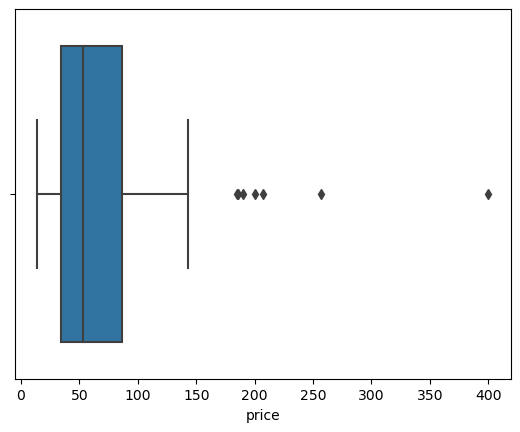

In [38]:
for i in range(0,25):
    sns.boxplot(df[df["number_of_reviews"]==i]["price"])
    plt.show()

In [39]:
df_price_per_number_of_reviews = df.groupby(["number_of_reviews"]).mean().price

In [40]:
df_price_per_number_of_reviews

number_of_reviews
0      107.120593
1       79.105638
2       73.973710
3       70.844828
4       71.784965
          ...    
195     56.363636
196     56.200000
197     49.833333
198     44.666667
199     51.444444
Name: price, Length: 200, dtype: float64

In [41]:
df_price_per_number_of_reviews.sort_values(ascending=False)

number_of_reviews
157    201.333333
102    116.419355
95     114.315789
111    113.600000
144    111.454545
          ...    
105     46.000000
192     44.700000
198     44.666667
186     44.285714
191     35.166667
Name: price, Length: 200, dtype: float64

Text(0, 0.5, 'Price')

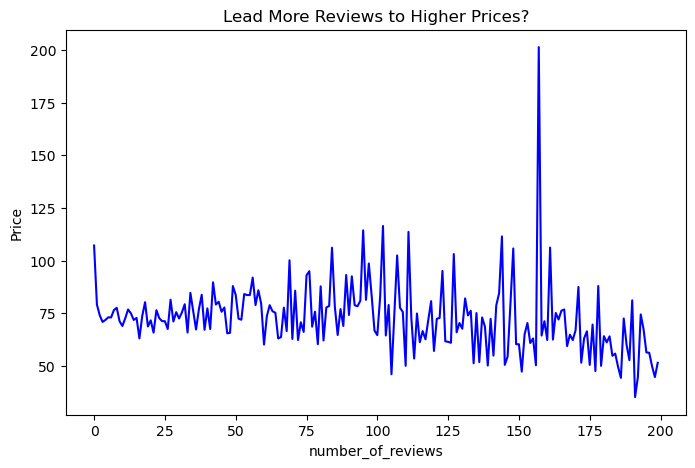

In [42]:
plt.figure(figsize=(8,5))
df_price_per_number_of_reviews.plot(kind="line", color="blue")
plt.title("Lead More Reviews to Higher Prices?")
plt.ylabel("Price")

# Last review

In [ ]:
df["last_review"].isnull().value_counts()

# Instant bookable


In [ ]:
df["instant_bookable"].value_counts()

In [ ]:
sns.countplot(df["instant_bookable"])

In [ ]:
df_instant_boockable = df.groupby(["instant_bookable"]).mean().price

In [ ]:
plt.figure(figsize=(8,5))
df_instant_boockable.plot(kind="line", color="blue")
plt.ylabel("Price")

In [ ]:
df_instant_boockable

In [ ]:
l_instant_boockable = ["t", "f"]
for i in l_instant_boockable:
    sns.boxplot(df[df["instant_bookable"]==i]["price"])
    plt.show()

In [ ]:
l_instant_boockable = ["t", "f"]
for i in l_instant_boockable:
    sns.kdeplot(df[df["instant_bookable"]==i]["price"])
    plt.show()

In [ ]:
l_instant_boockable = ["t", "f"]
for i in l_instant_boockable:
    sns.histplot(df[df["instant_bookable"]==i]["price"])
    plt.show()

# calculated_host_listings_count

In [ ]:
sorted(df["calculated_host_listings_count"].unique())

In [ ]:
sns.countplot(df["calculated_host_listings_count"])

In [ ]:
df_calculated_host_listings_count = df.groupby("calculated_host_listings_count").mean().price

In [ ]:
plt.figure(figsize=(8,5))
df_calculated_host_listings_count.plot(kind="line", color="blue")
plt.ylabel("Price")

In [ ]:
for i in range(10):
    sns.histplot(df[df["calculated_host_listings_count"]==i]["price"])
    plt.show()

In [ ]:
for i in range(10):
    sns.boxplot(df[df["calculated_host_listings_count"]==i]["price"])
    plt.show()

In [ ]:
df_calculated_host_listings_count

# reviews_per_month

In [43]:
df["reviews_per_month"].isnull().value_counts()

False    13156
True      5332
Name: reviews_per_month, dtype: int64

In [44]:
df["reviews_per_month"].unique()

array([5.800e-01, 4.200e-01,       nan, 1.300e-01, 1.120e+00, 3.000e-02,
       1.290e+00, 1.100e-01, 9.100e-01, 3.800e-01, 4.400e-01, 1.500e-01,
       2.210e+00, 4.600e-01, 3.300e-01, 1.000e-01, 8.700e-01, 5.100e-01,
       8.900e-01, 1.530e+00, 1.280e+00, 7.600e-01, 6.400e-01, 5.000e-02,
       6.800e-01, 1.900e-01, 1.570e+00, 9.800e-01, 6.700e-01, 1.680e+00,
       8.600e-01, 6.000e-01, 8.200e-01, 7.000e-02, 2.200e-01, 1.650e+00,
       9.000e-02, 5.200e-01, 9.300e-01, 3.500e-01, 1.270e+00, 4.500e-01,
       8.000e-02, 1.660e+00, 1.060e+00, 1.600e+00, 1.300e+00, 3.000e-01,
       1.320e+00, 3.200e-01, 1.240e+00, 1.050e+00, 3.400e-01, 1.900e+00,
       4.900e-01, 6.500e-01, 1.020e+00, 4.700e-01, 1.810e+00, 1.030e+00,
       2.500e-01, 5.900e-01, 1.400e+00, 4.000e-01, 9.600e-01, 1.130e+00,
       1.440e+00, 2.000e-02, 1.510e+00, 1.070e+00, 4.000e-02, 2.800e-01,
       3.900e-01, 1.410e+00, 7.200e-01, 2.100e-01, 1.200e-01, 1.100e+00,
       1.140e+00, 1.390e+00, 1.700e+00, 9.400e-01, 

C:\Users\ignci\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='reviews_per_month', ylabel='count'>

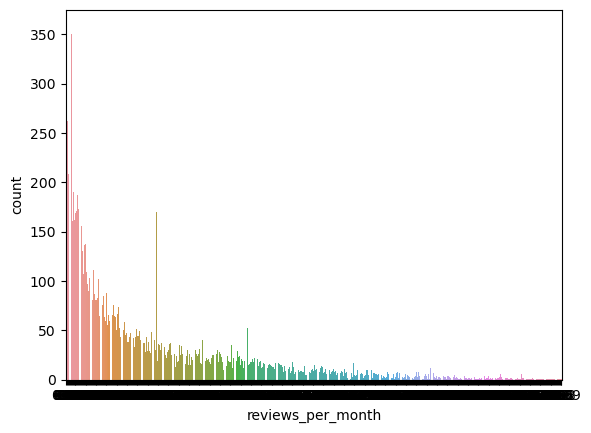

In [45]:
sns.countplot(df["reviews_per_month"])

In [46]:
df_reviews_per_month = df.groupby("reviews_per_month").mean().price

In [47]:
df_reviews_per_month

reviews_per_month
0.01      77.309524
0.02      69.354962
0.03      74.100478
0.04     119.909385
0.05      76.896797
            ...    
8.66      65.000000
8.68      37.000000
9.01      17.000000
9.53      46.000000
10.19     43.000000
Name: price, Length: 544, dtype: float64

Text(0, 0.5, 'Price')

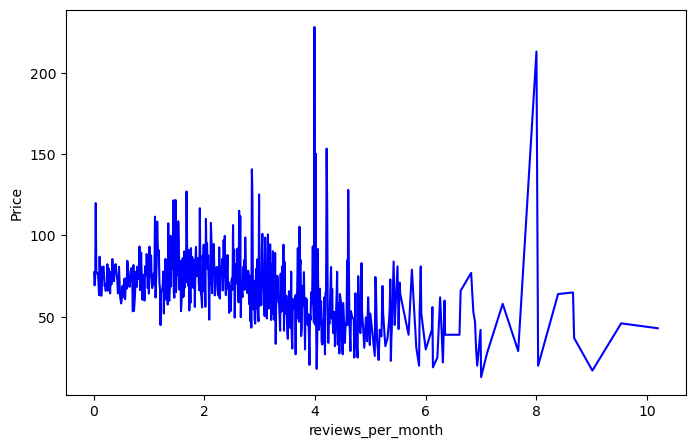

In [48]:
plt.figure(figsize=(8,5))
df_reviews_per_month.plot(kind="line", color="blue")
plt.ylabel("Price")

In [49]:
df_reviews_per_month.index

Float64Index([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
                0.1,
              ...
               7.39,  7.67,   8.0,  8.03,  8.39,  8.66,  8.68,  9.01,  9.53,
              10.19],
             dtype='float64', name='reviews_per_month', length=544)

In [ ]:
sns.scatterplot(x=df_reviews_per_month.index, y = df_reviews_per_month.values)

# host_id 

In [ ]:
df["host_id"]

In [ ]:
df_host_id = df.groupby("host_id").mean().price

In [ ]:
df_host_id.sort_values()

In [ ]:
sns.scatterplot(x=df_host_id.index, y = df_host_id.values)

In [ ]:
plt.figure(figsize=(8,5))
df_host_id.sort_values().plot(kind="line", color="blue")
plt.ylabel("Price")

In [ ]:
df_host_id.sort_values

In [ ]:
from collections import Counter
dict_property_types = dict(Counter(df["property_type"]))

dict_property_types[list(dict_property_types.keys())[0]]

list_others = []
for i in dict_property_types.keys():
    
    if dict_property_types[i] < 300:
        
        list_others.append(i)
        
for i in list_others:
    
    df["property_type"].replace(i,"Other", inplace = True)

df["property_type"].value_counts()

In [ ]:
df_property_type = df.groupby("property_type").mean().price
df_property_type["Entire apartment"]

In [ ]:
sns.scatterplot(x=df_property_type.index, y = df_property_type.values)

# Amenities

In [6]:
import json
l_amenities_cleaned = list()
for i in df["amenities"]:
    
    l_amenities_cleaned.append(json.loads(i))


In [7]:
l_amenities_cleaned

[['Kitchen',
  'Elevator',
  'Extra pillows and blankets',
  'Bed linens',
  'Hangers',
  'Iron',
  'Shampoo',
  'Wifi',
  'Heating',
  'Cooking basics',
  'Hot water',
  'Pocket wifi',
  'Dishes and silverware',
  'Long term stays allowed',
  'Hair dryer',
  'Washer',
  'Air conditioning',
  'Essentials'],
 ['Bed linens',
  'Refrigerator',
  'Dishes and silverware',
  'TV',
  'Air conditioning',
  'Essentials',
  'Coffee maker',
  'Extra pillows and blankets',
  'Fire extinguisher',
  'Hangers',
  'Cooking basics',
  'Hot water',
  'Pocket wifi',
  'Hair dryer',
  'Dedicated workspace',
  'Elevator',
  'Iron',
  'Long term stays allowed',
  'First aid kit',
  'Washer',
  'Kitchen',
  'Free parking on premises',
  'Lock on bedroom door',
  'Oven',
  'Shampoo',
  'Microwave',
  'Wifi',
  'Heating'],
 ['Pool',
  'Dishwasher',
  'Bed linens',
  'Refrigerator',
  'Crib',
  'Dishes and silverware',
  'TV',
  'Dryer',
  'Essentials',
  'Coffee maker',
  'Paid parking on premises',
  'Extra p

In [8]:
s_amenities_unique = set()

for i in l_amenities_cleaned:
    for j in i:
        s_amenities_unique.add(j)

In [9]:
s_amenities_unique

{' Le Petit Marseillais body soap',
 ' estándar refrigerator',
 ' linens',
 ' toiletries',
 '150" HDTV with Apple TV, Netflix, premium cable, standard cable',
 '18" HDTV with Netflix',
 '19" TV',
 '22" HDTV',
 '22" TV',
 '24" HDTV',
 '24" HDTV with Chromecast',
 '24" HDTV with standard cable',
 '24" TV',
 '24-hour fitness center',
 '27" HDTV with Amazon Prime Video',
 '29" HDTV with standard cable',
 '3 MARCAS DISTINTAS shampoo',
 '32" HDTV',
 '32" HDTV with Chromecast',
 '32" HDTV with Chromecast, standard cable',
 '32" HDTV with Netflix',
 '32" HDTV with Netflix, Amazon Prime Video',
 '32" HDTV with standard cable',
 '32" TV',
 '32" TV with standard cable',
 '35" HDTV',
 '38" HDTV with standard cable',
 '40" HDTV',
 '40" HDTV with Amazon Prime Video, Apple TV, Chromecast, HBO Max, Netflix, premium cable, Roku, standard cable',
 '40" HDTV with Amazon Prime Video, Apple TV, HBO Max, Netflix, Roku, standard cable',
 '40" HDTV with Amazon Prime Video, HBO Max, Chromecast, Netflix, premiu

In [10]:
d_contador = {i:0 for i in s_amenities_unique}
for i in l_amenities_cleaned:
    for j in i:
        d_contador[j] = d_contador[j] + 1

In [11]:
l_sorted_amenities = list(sorted(d_contador.items(), key=lambda item: item[1]))
l_sorted_amenities = l_sorted_amenities[::-1]
l_sorted_amenities[:20]

[('Wifi', 18210),
 ('Essentials', 17635),
 ('Kitchen', 17080),
 ('Heating', 16754),
 ('Long term stays allowed', 16618),
 ('Hangers', 15578),
 ('Washer', 15521),
 ('Iron', 13833),
 ('Hair dryer', 13781),
 ('TV', 13663),
 ('Shampoo', 12893),
 ('Hot water', 12452),
 ('Dedicated workspace', 11945),
 ('Air conditioning', 11915),
 ('Dishes and silverware', 10129),
 ('Refrigerator', 9650),
 ('Elevator', 9403),
 ('Microwave', 9332),
 ('Cooking basics', 9034),
 ('Coffee maker', 8823)]

In [13]:
df_amenities = pd.DataFrame()

for j in l_sorted_amenities[:20]:
    
    df_amenities[j[0]] = [1 if j[0] in i else 0 for i in l_amenities_cleaned]

In [14]:
df_amenities

,Wifi,Essentials,Kitchen,Heating,Long term stays allowed,Hangers,Washer,Iron,Hair dryer,TV,Shampoo,Hot water,Dedicated workspace,Air conditioning,Dishes and silverware,Refrigerator,Elevator,Microwave,Cooking basics,Coffee maker
0,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,0,1,0
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,0,1,1,1,0,0,1,0,1,1,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19328,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,1,0,1,1,0
19329,1,0,1,0,1,0,1,0,0,1,0,1,1,1,0,0,0,0,1,0
19330,1,0,1,1,1,0,1,0,0,1,0,1,1,0,1,1,0,1,1,0
19331,1,0,1,1,1,0,1,0,0,1,0,1,1,0,1,1,0,1,1,0


In [15]:

df = pd.concat([df, df_amenities], axis = 1)


In [16]:
df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,Shampoo,Hot water,Dedicated workspace,Air conditioning,Dishes and silverware,Refrigerator,Elevator,Microwave,Cooking basics,Coffee maker
0,6369.0,https://www.airbnb.com/rooms/6369,2.021041e+13,2021-04-15,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,NaN,https://a0.muscache.com/pictures/683224/4cc318...,13660.0,https://www.airbnb.com/users/show/13660,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,21853.0,https://www.airbnb.com/rooms/21853,2.021041e+13,2021-04-16,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531.0,https://www.airbnb.com/users/show/83531,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,23001.0,https://www.airbnb.com/rooms/23001,2.021041e+13,2021-04-16,Apartmento Arganzuela- Madrid Rio,"Apartamento de tres dormitorios dobles, gran s...","Barrio Arganzuela, junto a Madrid Rio, zonas c...",https://a0.muscache.com/pictures/58e6a770-509c...,82175.0,https://www.airbnb.com/users/show/82175,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,24805.0,https://www.airbnb.com/rooms/24805,2.021041e+13,2021-04-15,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...","The area is next to the Gran Via, so people li...",https://a0.muscache.com/pictures/miso/Hosting-...,346366726.0,https://www.airbnb.com/users/show/346366726,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,26825.0,https://www.airbnb.com/rooms/26825,2.021041e+13,2021-04-15,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,"Es un barrio muy tranquilo, en una zona de Mad...",https://a0.muscache.com/pictures/149358/218d5b...,114340.0,https://www.airbnb.com/users/show/114340,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
18279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
18437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
18698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [17]:
for i in l_sorted_amenities[:100]:    
    sr_amenities = df.groupby(i[0]).mean().price
    print(sr_amenities)

Wifi
0.0    85.664855
1.0    90.579135
Name: price, dtype: float64
Essentials
0.0    81.997615
1.0    91.095274
Name: price, dtype: float64
Kitchen
0.0    92.581646
1.0    89.992095
Name: price, dtype: float64
Heating
0.0    96.656534
1.0    89.318498
Name: price, dtype: float64
Long term stays allowed
0.0    112.959485
1.0     86.645944
Name: price, dtype: float64
Hangers
0.0    93.827642
1.0    89.445370
Name: price, dtype: float64
Washer
0.0    93.207623
1.0    89.579694
Name: price, dtype: float64
Iron
0.0    94.456542
1.0    88.639372
Name: price, dtype: float64
Hair dryer
0.0    95.831993
1.0    88.063411
Name: price, dtype: float64
TV
0.0    90.944027
1.0    90.024301
Name: price, dtype: float64
Shampoo
0.0    86.021702
1.0    92.435495
Name: price, dtype: float64
Hot water
0.0    90.721976
1.0    90.058929
Name: price, dtype: float64
Dedicated workspace
0.0    91.109704
1.0    89.791564
Name: price, dtype: float64
Air conditioning
0.0    94.258909
1.0    87.832965
Name: price, 

KeyError: 'Bed linens'

In [19]:
d_difference = dict()

for i in l_sorted_amenities[:20]:    
    sr_amenities = df.groupby(i[0]).mean().price
    d_difference[i[0]] = abs(sr_amenities.values[1]-sr_amenities.values[0])

In [20]:
d_difference

{'Wifi': 4.914280014473377,
 'Essentials': 9.097658943769744,
 'Kitchen': 2.5895513271692323,
 'Heating': 7.338035419594263,
 'Long term stays allowed': 26.313541239070403,
 'Hangers': 4.382271785473421,
 'Washer': 3.6279285636224046,
 'Iron': 5.81716986987206,
 'Hair dryer': 7.768581286590333,
 'TV': 0.9197257548153601,
 'Shampoo': 6.413793785502122,
 'Hot water': 0.6630468847009752,
 'Dedicated workspace': 1.3181399427675302,
 'Air conditioning': 6.425944389458152,
 'Dishes and silverware': 9.632112537261975,
 'Refrigerator': 7.579000065927005,
 'Elevator': 3.9168477997036035,
 'Microwave': 7.718421944916443,
 'Cooking basics': 10.155527187801084,
 'Coffee maker': 8.740820456129555}

In [21]:
l_sorted_difference = list(sorted(d_difference.items(), key=lambda item: item[1]))
l_sorted_difference = l_sorted_difference[::-1]
l_sorted_difference

[('Long term stays allowed', 26.313541239070403),
 ('Cooking basics', 10.155527187801084),
 ('Dishes and silverware', 9.632112537261975),
 ('Essentials', 9.097658943769744),
 ('Coffee maker', 8.740820456129555),
 ('Hair dryer', 7.768581286590333),
 ('Microwave', 7.718421944916443),
 ('Refrigerator', 7.579000065927005),
 ('Heating', 7.338035419594263),
 ('Air conditioning', 6.425944389458152),
 ('Shampoo', 6.413793785502122),
 ('Iron', 5.81716986987206),
 ('Wifi', 4.914280014473377),
 ('Hangers', 4.382271785473421),
 ('Elevator', 3.9168477997036035),
 ('Washer', 3.6279285636224046),
 ('Kitchen', 2.5895513271692323),
 ('Dedicated workspace', 1.3181399427675302),
 ('TV', 0.9197257548153601),
 ('Hot water', 0.6630468847009752)]

In [22]:
for i in l_sorted_difference[:10]:
    print(i[0])

Long term stays allowed
Cooking basics
Dishes and silverware
Essentials
Coffee maker
Hair dryer
Microwave
Refrigerator
Heating
Air conditioning


In [23]:
l_amenities_valuables = [i[0] for i in l_sorted_difference[:10]]

In [24]:
l_amenities_valuables

['Long term stays allowed',
 'Cooking basics',
 'Dishes and silverware',
 'Essentials',
 'Coffee maker',
 'Hair dryer',
 'Microwave',
 'Refrigerator',
 'Heating',
 'Air conditioning']

In [25]:
df_amenities_valuables = pd.DataFrame()

for j in l_amenities_valuables:
    
    df_amenities_valuables[j] = [1 if j in i else 0 for i in l_amenities_cleaned]

In [26]:
df_amenities_valuables

,Long term stays allowed,Cooking basics,Dishes and silverware,Essentials,Coffee maker,Hair dryer,Microwave,Refrigerator,Heating,Air conditioning
0,1,1,1,1,0,1,0,0,1,1
1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,0
3,1,1,1,1,1,1,1,1,1,1
4,1,0,1,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
19328,1,1,1,0,0,0,1,1,0,0
19329,1,1,0,0,0,0,0,0,0,1
19330,1,1,1,0,0,0,1,1,1,0
19331,1,1,1,0,0,0,1,1,1,0
